{'INV_0_0\n3.0': (113.68, 126.16), 'INV_1_0\n1.0': (52.679, 30.052), 'INV_1_1\n1.0': (175.68, 30.052)}
3.0


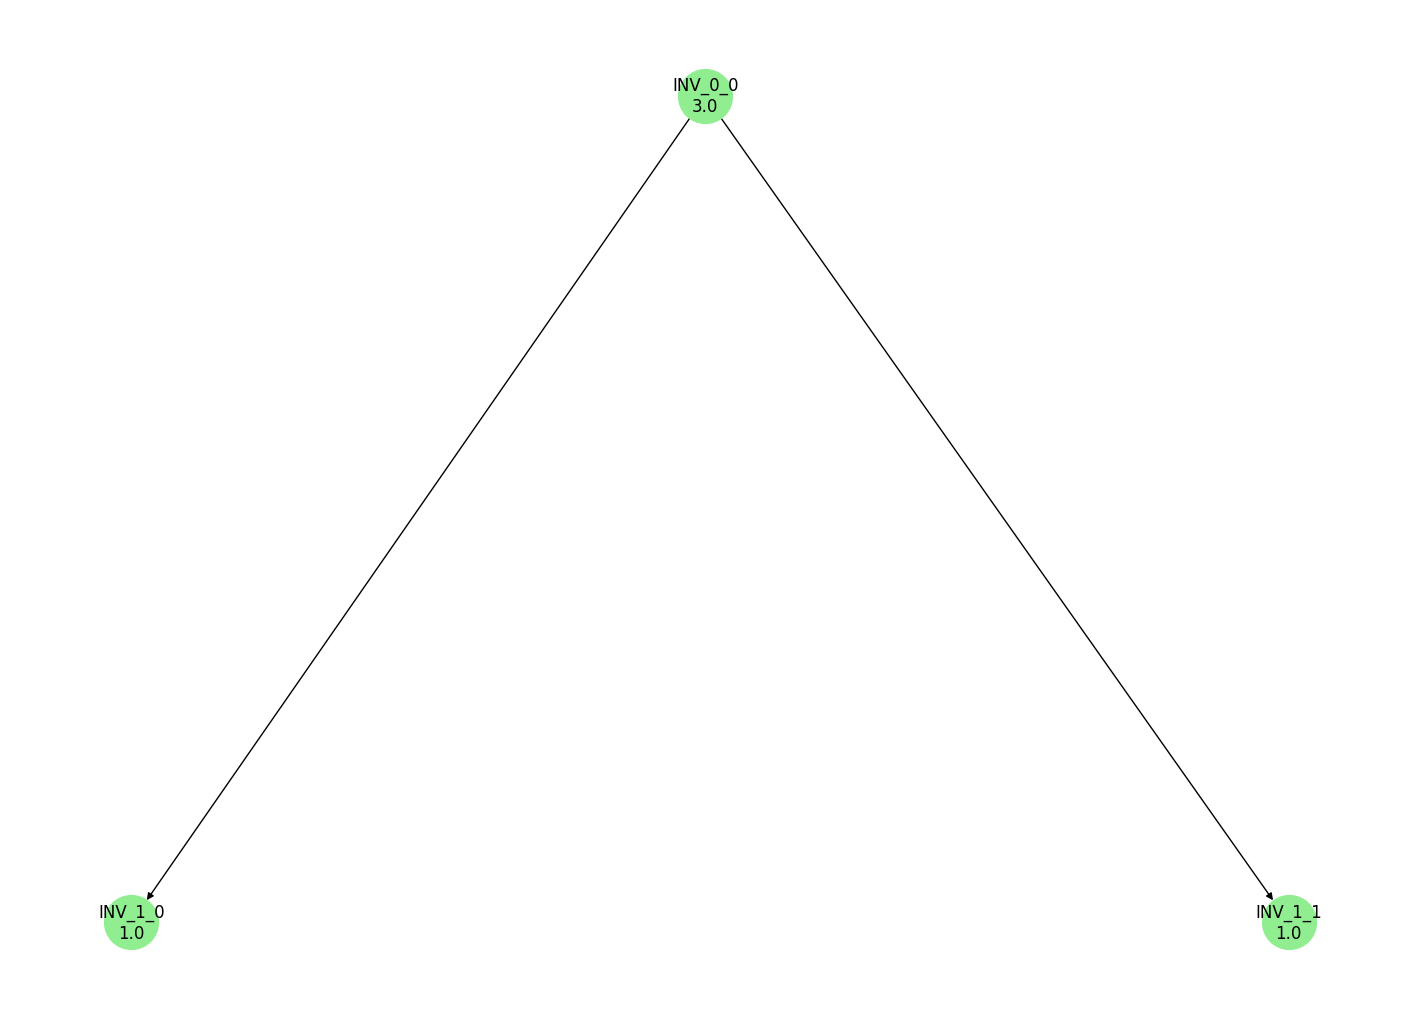

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams

class gate:
    def __init__(self,type):
        self.children = []
        self.type = type
        self.layer = 0
        self.number = 0
        if type == "INV":
            self.P = 1
            self.g = 1 
            self.Co = 4
            self.Ci = 4
        elif type == "NAND":
            self.P = 2
            self.g = 7/4
            self.Co = 8 
            self.Ci = 5 
        elif type == "3NAND":
            self.P = 3
            self.g = 10/4
            self.Co = 12
            self.Ci = 10
        self.wirecap = 0
    def generatename(self):
        self.name = self.type +"_" + str(self.layer) + "_" + str(self.number)

    def add_downstream(self, obj):
        self.children.append(obj)
    
    def calculate_delays(self):
        Cext = self.wirecap 
        for child in self.children:
            Cext+=child.Ci
        f = Cext/self.Co
        self.delay = self.P + self.g*f
        self.name = self.name + "\n" + str(self.delay)
        for child in self.children:
            child.calculate_delays()

    
    def plotDelays(self, graph):
        for child in self.children:
            graph.add_edge(self.name, child.name, delay=child.delay)
            child.plotDelays(graph)
        return graph
        

#Allow a user to input a tree structure
def fill_tree(obj):
    fanout = int(input("Enter fanout for {}".format(obj.type)))
    for i in range(fanout):
        child = gate(input("Enter gate type for gate #{}".format(i)))
        child.number = i
        child.layer = obj.layer + 1
        child.generatename()
        obj.add_downstream(child)
    for child in obj.children:
        child = fill_tree(child)
    return obj

root = gate("INV")
root.number = 0
root.layer = 0
root.generatename()
root = fill_tree(root)
root.calculate_delays()

graph = nx.DiGraph()
graph.add_node(root.name,delay=root.delay)
graph = root.plotDelays(graph)



rcParams['figure.figsize'] = 14, 10
pos=graphviz_layout(graph, prog='dot')
print(pos)
nx.draw(graph, pos=pos,
        node_color='lightgreen', 
        node_size=1500,
        with_labels=True, 
        arrows=True)
print(root.delay)
